In [43]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [44]:
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/AI/CODE/IMDB_Dataset_1400.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,negative
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [45]:
# import pandas as pd
# df=pd.read_csv('/content/gdrive/MyDrive/AI/CODE/IMDB_Dataset_950.csv')
# # df=df.loc[df.index[0:1000],["review","sentiment"]]
# df.head()

In [46]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

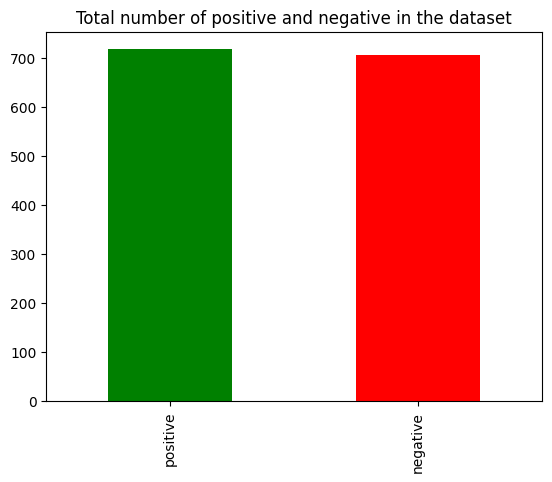

In [47]:
import matplotlib.pyplot as plt
df['sentiment'].value_counts().plot.bar(color = ["g","r"])
plt.title('Total number of positive and negative in the dataset')
plt.show()

The homogeneous multidimensional array is the main object of NumPy. It is basically a table of elements which are all of the same type and indexed by a tuple of positive integers. The dimensions are called axis in NumPy.

In [48]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)
scaler
StandardScaler()
scaler.mean_
scaler.scale_
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [49]:
import numpy as np
df=df.replace(np.nan,'hello how are you')

NLTK is a toolkit build for working with NLP in Python. It provides us various text processing libraries with a lot of test datasets. A variety of tasks can be performed using NLTK such as tokenizing, parse tree visualization, stopward ,stemming etc…

In [50]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import os
import warnings

**Text normalization**
Words are tokenized. To separate a statement into words, we utilise the word tokenize () method.

In [52]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

**Removing html strips and noise text**
Here in data head we can see some html code so first we need to clean that html strips. Also removing some noisy texts along with square brackets.

In [53]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['review']=df['review'].apply(denoise_text)

**Removing special characters**
Because we’re working with English-language evaluations in our dataset, we need to make sure that any special characters are deleted.

In [54]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['review']=df['review'].apply(remove_special_characters)

**Text stemming**
Stemming is a technique for eliminating affixes from words in order to retrieve the base form. It’s the same as pruning a tree’s branches down to the trunk. The stem of the terms eating, eats, and eaten, for example, is eat.

In [55]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['review']=df['review'].apply(simple_stemmer)

**Removing stopwords**
Stop words are words that have little or no meaning, especially when synthesising meaningful aspects from the text.
Stop words are words that are filtered out of natural language data (text) before or after it is processed in computers. While “stop words” usually refers to a language’s most common terms, all-natural language processing algorithms don’t employ a single universal list.
Stopwords include words such as a, an, the, and others.

Removing stopwords:
When we use the features from a text to model, we will encounter a lot of noise. These are the stop words like the, he, her, etc…

In [56]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
df['review']=df['review'].apply(remove_stopwords)

{'he', 'their', 'whom', 'if', "that'll", 'an', 'hasn', 'those', 've', "wasn't", 'into', 'o', 'over', 'during', 'shouldn', 'ma', 'aren', 'just', "should've", 'your', 'can', "won't", 'of', 'for', 'haven', 'them', 're', 'this', 'these', 'what', 'our', 'herself', 'is', 'more', 'themselves', 'again', 'after', 'such', 'it', 'theirs', 'off', 'all', "wouldn't", 'yourself', "needn't", 'some', 'through', 'there', 'nor', 'couldn', 'm', 'both', 'were', 'above', 'her', 'and', 'on', 'has', 'ourselves', 'because', 'who', "don't", "you've", 'shan', 'she', 'against', 'weren', 'same', 'yours', 'hadn', 'own', "mustn't", 'with', 'below', 'once', 'so', "shan't", 'its', 'am', 'having', 'me', 'very', 'did', 'where', 'll', "hadn't", 'was', 'to', 'will', "shouldn't", 'out', 'as', 'between', 'now', 'ain', "she's", 'when', 'than', 'hers', 'then', 'in', 'from', 'which', 'but', 'd', 'himself', 'had', "hasn't", 'here', 'wasn', 'doing', 'they', 'a', 'being', 'mightn', 'be', 'until', 'while', 'each', 'should', 'didn'

In [57]:
df.head()

,review,sentiment
0,one review ha mention watch 1 oz episod youll ...,positive
1,wonder littl product film techniqu veri unassu...,negative
2,thought thi wa wonder way spend time hot summe...,positive
3,basic famili littl boy jake think zombi hi clo...,negative
4,petter mattei love time money visual stun film...,positive


**CountVectorizer** is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'])
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [59]:
from sklearn.model_selection import train_test_split
X=X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.25, random_state=55)

Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing.

In [60]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
#To preprocess the data and remove any negative value as MultinomialNB does not work for negative values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model comparison**

In [69]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter
import warnings
import pandas as pd
from sklearn.metrics import accuracy_score

warnings.filterwarnings(action='ignore')

In [70]:
# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

models = {
    "Random Forest": {"model": RandomForestClassifier(), "perf": 0},
    "XGBoost": {"model": XGBClassifier(eval_metric='mlogloss'), "perf": 0},
    "Logistic Regr.": {"model": LogisticRegression(), "perf": 0},
    "MultinomialNB": {"model": MultinomialNB(), "perf": 0},
    "KNN": {"model": KNeighborsClassifier(), "perf": 0},
    "Decision Tree": {"model": DecisionTreeClassifier(), "perf": 0},
    "SVM (Linear)": {"model": LinearSVC(), "perf": 0},
    "AdaBoost": {"model": AdaBoostClassifier(n_estimators=100), "perf": 0}
}

for name, model in models.items():
    start = perf_counter()
    model['model'].fit(X_train, y_train_encoded)  # Use encoded labels for training
    duration = perf_counter() - start
    duration = round(duration, 2)
    model["perf"] = duration

In [71]:
models_acc = []
for name, model in models.items():
    y_pred_encoded = model["model"].predict(X_test)  # Get predicted labels
    accuracy = accuracy_score(y_test_encoded, y_pred_encoded)  # Calculate accuracy
    models_acc.append([name, accuracy, model["perf"]])

In [72]:
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy', 'Training time (sec)']
df_acc.sort_values(by='Accuracy', ascending=False, inplace=True)
df_acc.reset_index(drop=True, inplace=True)
print(df_acc)

            Model  Accuracy  Training time (sec)
0   Random Forest  0.837535                 5.42
1  Logistic Regr.  0.834734                 1.08
2    SVM (Linear)  0.823529                 0.22
3         XGBoost  0.809524               100.90
4   MultinomialNB  0.806723                 0.13
5        AdaBoost  0.778711                36.35
6   Decision Tree  0.711485                 1.40
7             KNN  0.535014                 0.02


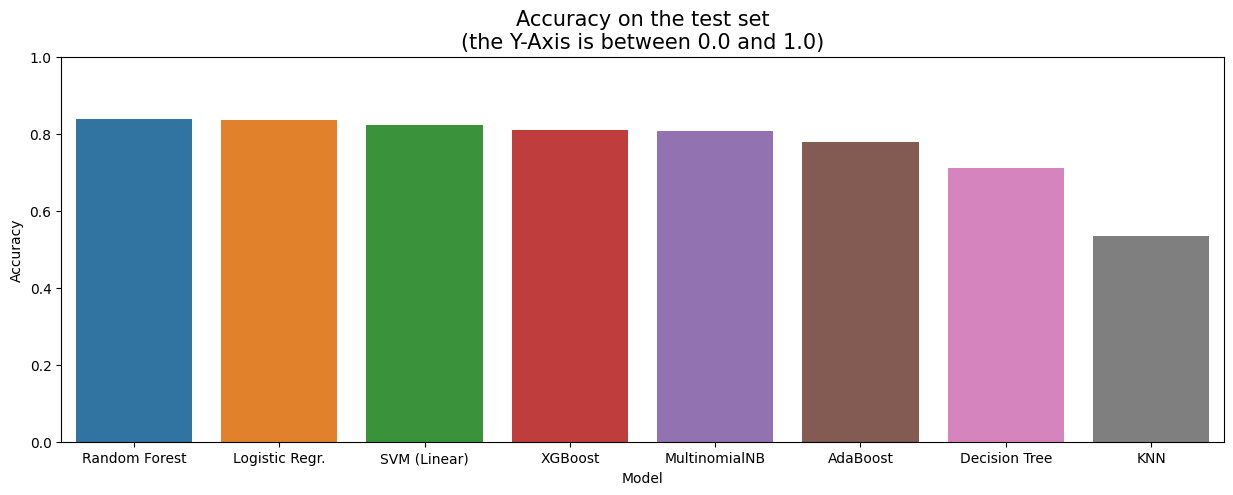

In [73]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Accuracy', data = df_acc)
plt.title('Accuracy on the test set\n(the Y-Axis is between 0.0 and 1.0)', fontsize = 15)
plt.ylim(0.0,1)
plt.show()

Ensemble Algorithm A single algorithm may not make the perfect prediction for a given dataset. Machine learning algorithms have their limitations and producing a model with high accuracy is challenging. If we build and combine multiple models, the overall accuracy could get boosted. The combination can be implemented by aggregating the output from each model with two objectives: reducing the model error and maintaining its generalization. The way to implement such aggregation is done below:

Ensemble models is a machine learning approach to combine multiple other models in the prediction process. Those models are referred to as base estimators.

In [74]:
#Defining Hybrid Ensemble Learning Model
estimators = []

In [75]:
#Defining 2 Logistic Regression Classifier
model1 = LogisticRegression(random_state=0)
estimators.append(('lr1', model1))
model2 = LogisticRegression(random_state=0)
estimators.append(('lr2', model2))

In [76]:
#Defining 2 SVM (linear) Classifier
model3 = LinearSVC(random_state=0)
estimators.append(('svc1', model3))
model4 = LinearSVC(random_state=0)
estimators.append(('svc2', model4))

In [77]:
#Defining 2 XGBoost Classifier
model5 = XGBClassifier(eval_metric='mlogloss')
estimators.append(('xgb1', model5))
model6 = XGBClassifier(eval_metric='mlogloss')
estimators.append(('xgb2', model6))

In [78]:
#Defining 2 MultinomialNB Classifier
model7 = MultinomialNB(alpha = 1.0)
estimators.append(('mnb1', model7))
model8 = MultinomialNB(alpha = 1.0)
estimators.append(('mnb2', model8))

In [79]:
#Defining 2 Random Forest Classifier
model9 = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
estimators.append(('rf1', model9))
model10 = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
estimators.append(('rf2', model10))

In [80]:
#Defining 2 Decision Tree Classifiers
model11 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model11))
model12 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model12))

In [81]:
# Defining 2 KNN Classifiers
model13 = KNeighborsClassifier(n_neighbors=3)
estimators.append(('knn1',model13))
model14 = KNeighborsClassifier(n_neighbors=5)
estimators.append(('knn2',model14))

In [82]:
# Defining the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

In [83]:
#Confisuin matrix
cm_HybridEnsembler = confusion_matrix(y_test, y_pred)
print(cm_HybridEnsembler)

[[141  29]
 [ 26 161]]


In [84]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average="binary", pos_label="positive")
print('F1 Score: %f ' % f1)

F1 Score: 0.854111 


In [86]:
#Calculating Accuracy of the Hybrid Model
from sklearn.metrics import accuracy_score
accuracy_score (y_test,y_pred )

0.84593837535014